Paper Outline:

I. Introduction
   A. Background on fish population studies
   B. Importance of clustering in ecological data analysis
   C. Overview of the study area and data sources

II. Data Collection and Preprocessing
   A. Description of fish abundance data
   B. Data cleaning and normalization techniques
   C. Initial exploratory data analysis 

III. Clustering Methodology
   A. Selection of clustering algorithms
   B. Parameter tuning and validation methods
   C. Implementation details    

IV. Results and Visualization
   A. Cluster characteristics and interpretations of large cluster of lentic fish
   B. Visualization techniques used (heatmaps, time series plots)

V. Cluster Analysis of Lentic Fish Cluster
    A. Detailed examination of the largest cluster of lentic fish
    B. Presence/absense patterns and trends over time
    C. Ecological implications of the findings
    
VI. Discussion
    A. Summary of key findings and comparison with previous studies
    B. Limitations of the current study
    C. Implications for fish population management and conservation
    D. Future research directions and applications
    C. Final thoughts on the role of clustering in ecological studies


# Fish Cluster Analysis - LTRM Data
## I. Wrangle and Filter Data

This code reformats the LTRM data to be in the format of (location, year, hydrological data, each fish species presence/absence).

For reference: [Data Dictionary](https://www.umesc.usgs.gov/cgi-bin/ltrmp/fish/fish_meta.pl)
***

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A spatial merge of the ltrm fish data was completed with the aquatic areas dataset. The dataset here includes all sites where daytime electrofishing was used in Pools 4, 8 and 13. Removed sites that had ‘summary’ codes as 1 or 2, which indicate gear failure or an inaccessible site.

Following the field ‘batchno’ are fields associated with Aquatic Areas I and Aquatic Areas III. The field ‘AQUA_CODE3’ indicates contiguous floodplain lakes as ‘CFL’ and has a suite of associated metrics that follow, some of which may be explanatory for lentic fish clusters.

If we want to differentiate areas in the ‘impounded area’ of a pool, the field ‘AQUA_CODE1’ indicates those as ‘CIMP.’ Alternatively, included are river mile (‘RMILE’) and a rescaled river mile metric (‘RM_rescale’) as an approach to contrast upstream and downstream portions of the reach.

In [38]:
df_data = pd.read_csv("ltrm_fish_D_p4813_aa1_aa3_all.csv", low_memory=False)
pd.options.display.max_columns = None  # to display all columns
print(df_data.shape) # shows the number of rows and columns
df_data.head(5)

(314004, 176)


,site,barcode,fstation,sitetype,stratum,sdate,stime,fdate,ftime,pool,lcode,gear,period,rep,summary,project,effdist,effhr,effmin,pwrgoal,pwrused,volts,v_qf,amps,a_qf,pulses,p_qf,dutycyc,dc_qf,utmzone,utm_e,utm_n,gisgrid,zone15e,zone15n,gpsmeth,gpsacc,secchi,s_qf,temp,t_qf,depth,d_qf,cond,c_qf,current,cv_qf,do,do_qf,stageht,sh_qf,sveg92,vegd,eveg92,esveg92,substrt,snag,wingdyke,trib,riprap,inout,closing,flooded,othrstrc,labind,contanrs,shtcnt,totfishc,leader,pageno,rec_site,rownum,fishcode,length,tfs,grp_wdth,catch,weight,pathcode,subproj,userdef,recorder,nfsh_cnt,orphflag,batchno,OBJECTID_1,Join_Count,TARGET_FID,OBJECTID_12,AQUA_CODE_AA1,OBJECTID_12_13,Join_Count_1,TARGET_FID_1,OBJECTID_12_13_14,uniq_id,aa_num,AQUA_CODE_AA3,AQUA_DESC,pool_1,Area,Perimeter,Acres,Hectares,bath_pct,max_depth,avg_depth,sd_depth,tot_vol,area_gt50,area_gt100,area_gt200,area_gt300,avg_fetch,sdi,econ,sill,min_rm,max_rm,len_met,len_outl,pct_outl,num_outl,len_oute,pct_oute,num_oute,pct_aqveg,pct_opwat,len_terr,pct_terr,pct_chan,len_wetf,pct1wetf,pct2wetf,len_wd,wdl_p_m2,num_wd,sco_wd,psco_wd,len_revln,rev_p_m2,num_rev,pct_rev,pct_rev2,area_tpi1,pct_tpi1,area_tpi2,pct_tpi2,area_tpi3,pct_tpi3,area_tpi4,pct_tpi4,sinuosity,year_phot,FID_1,comm_TA,avg_group_,ratio,ID,uniq_id_1,avg_dept_1,avg_fetc_1,pct_chan_1,hect,Field11,FID_12,comm_TA_1,avg_group1,ratio_1,ID_1,uniq_id_12,avg_dept_2,avg_fetc_2,pct_chan_2,hect_1,RMILE,RM_rescale
0,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,1.0,SNGR,246.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6754,1,6754,702.0,CIMP,6754,1,6754,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
1,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN,0.6,NaN,306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,NaN,1.0,12,NaN,1.0,1.0,2.0,SNGR,620.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,201.0,12.0,0,9401,6755,1,6755,702.0,CIMP,6755,1,6755,1004.0,P13_CFL_200,1004.0,CFL,Contiguous Floodplain Lake,P13,16783827.12,42663.7284,4147.374004,1678.382712,97.959928,5.91,1.05058,0.398636,17025389.0,15331033.0,8777131.885,153333.4296,32969.77506,3.067405,2.937706,23.933951,546202.7924,522.579468,528.235291,9102.141791,24285.11305,56.922154,4.0,1612.891223,3.780474,14.0,76.196592,23.803408,16765.72413,39.297372,60.702628,10094.54659,23.660723,60.209428,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2010.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,6.0,31.0,0.070984,0.222258,0.319376,31.0,P13_CFL_200,1.05058,3.067405,60.702628,1678.38271,523,1.0
2,NaN,13000524,3,0,IMP-S,7/12/1994,9:40,7/12/1994,9:55,13,D18.RS,D,1,NaN,5.0,M-,200.0,NaN,15,3394.0,3520.0,220.0,NaN,16.0,NaN,60.0,NaN,25.0,NaN,15,736908,4642751,73695.64255,736908,4642751,1.0,0.2,60.0,2.0,25.9,NaN

May want to filter by AQUA_CODE_AA1 to only include backwater areas('CIMP' and 'CFSA')

catch/effmin summarize by barcode and fishcode to get catch per unit effort
feed into 

-   Filter to keep only rows where the fishcode column is not missing. 
-   Remove unknown fish codes (those starting with 'U-') and NFSH = no fish
-   Create a new column year by converting the sdate column to datetime and extracting the year component.

In [39]:
df_data = df_data[df_data['fishcode'].notna()].reset_index(drop=True)
# remove fishcode NFSH and unknown fish codes (those starting with 'U-')
df_data = df_data[(~df_data['fishcode'].str.startswith('U-')) & (df_data['fishcode'] != 'NFSH')].reset_index(drop=True)
df_data['year'] = pd.to_datetime(df_data['sdate']).dt.year
print(df_data.shape)

(313015, 177)


## <a id='toc1_1_'></a>[Filter Further for Analysis](#toc0_)

Filter to period 3.

In [40]:
df = df_data[df_data['period'] == 3].reset_index(drop=True)
print(df.shape)

(127700, 177)


Only some of the columns are relevant, so we will drop the rest. 

In [41]:
keep_cols =['utm_e', 'utm_n', 'barcode', 'year', 'sdate', 'pool', 'fishcode', 
            'length', 'temp', 'depth', 'current', 'do', 'secchi',
              'esveg92', 'substrt', 'cond', 'snag', 'riprap', 'inout', 'flooded']
df = df[keep_cols].reset_index(drop=True)
print(df.shape)
df['year'].min()

(127700, 20)


1993

## <a id='toc1_2_'></a>[Missing data](#toc0_)

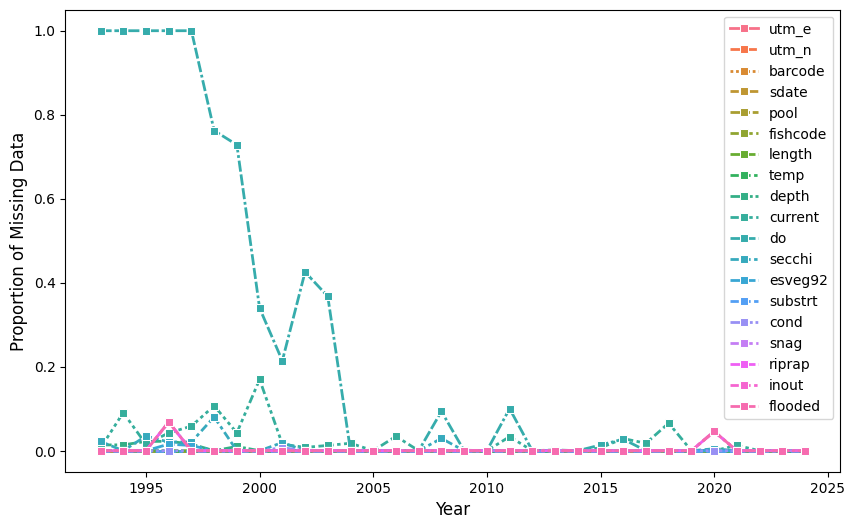

In [42]:
yearly_missing_df = df.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

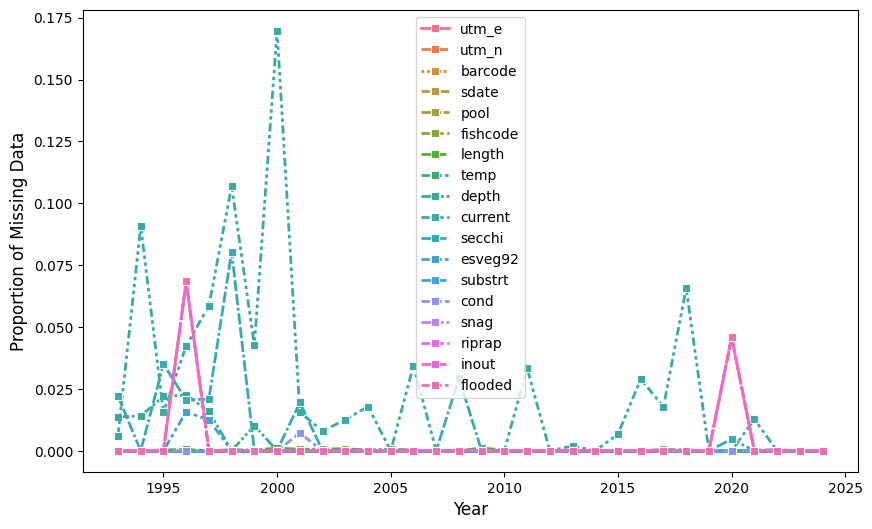

In [43]:
df_nodo = df.drop(columns=['do']).reset_index(drop=True)
yearly_missing_df = df_nodo.groupby('year').apply(lambda x: x.isna().mean(), include_groups=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

Keeps only complete cases (rows with no missing data) in the selected columns

In [44]:
#df = df[(df['year'] >= 2004) & (df.isna().sum(axis=1) == 0)].reset_index(drop=True)
#df = df[df.isna().sum(axis=1) == 0].reset_index(drop=True)
print(df.shape) # shows the number of rows and columns
df.head()
df['year'].min()

(127700, 20)


1993

In [45]:
print(f"Number of unique samples (identified by barcode)= {df.barcode.unique().shape[0]}")
print(f"Number of unique fishcodes = {df.fishcode.unique().shape[0]}")

Number of unique samples (identified by barcode)= 2412
Number of unique fishcodes = 103


Remove hybrid fish codes

In [46]:
print("before ", df.shape)
hybrid_fish = ['BCWC', 'BGLE', 'BGOS', 'BGRS', 'BGWM', 'CCGF', 'GSBG', 'GSPS', 'GSRS', 'GSWM', 'GSOS', 'LNST', 'OSLE', 'PSBG', 'PSOS', 'PSWM', 'SBWB', 'SCBS', 'SGWE', 'SNPD', 'WPYB']  
fish_to_remove =['UNID']
df = df[~df['fishcode'].isin(fish_to_remove)].reset_index(drop=True)
print("after fish removed", df.shape)
no_hybrid = df[~df['fishcode'].isin(hybrid_fish)].reset_index(drop=True)
print("hybrid removed ", no_hybrid.shape)

before  (127700, 20)
after fish removed (127697, 20)
hybrid removed  (127605, 20)


Summarize the dataset by grouping by BARCODE, then aggregating environmental and categorical variables, and finally expand fish species presence into separate columns.
-   Numerical columns (e.g., temp, depth, current, do, esveg92, cond) are summarized by their median value for each year/pool combination.
-   Categorical columns (e.g., substrt, pool) use the mode (most frequent value).
-   Presence/absence columns (e.g., snag, riprap, inout, flooded) use the maximum value, assuming binary encoding (0/1).
-   Fish codes are aggregated into a list of all fish species observed in each group.

In [47]:
#df choices....original = df, no_hybrid, comb_hybrid

agg_df = no_hybrid.groupby(['barcode']).agg(
    year=('year', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    utm_e=('utm_e', 'median'),
    utm_n=('utm_n', 'median'),
    median_temp=('temp', 'median'),
    median_depth=('depth', 'median'),
    median_current=('current', 'median'),
    median_do=('do', 'median'),
    median_secchi=('secchi', 'median'),
    median_esveg92=('esveg92', 'median'),    
    mode_substrt=('substrt', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    mode_pool=('pool', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    fish_codes=('fishcode', lambda x: list(x)) # all fish observed on that date
).reset_index()

# Expand fish presence/absence
unique_fish = set([item for sublist in agg_df['fish_codes'] for item in sublist])
# Create only fish presence/absence columns
fish_df = pd.DataFrame({fish: agg_df['fish_codes'].apply(lambda x: fish in x) for fish in unique_fish})
agg_df = pd.concat([agg_df, fish_df], axis=1)   
agg_df.drop(columns=['fish_codes'], inplace=True)
# Add richness column
# agg_df['richness'] = fish_df.sum(axis=1)
# fish_df['richness'] = fish_df.sum(axis=1)

In [48]:
print(agg_df.shape)
agg_df.head()
agg_df['mode_pool'].unique()

(2412, 110)


array([ 4,  8, 13])

In [49]:
print(fish_df.shape)
fish_df.head()

(2412, 93)


,MMSN,BNMW,WSDR,WTBS,FHCF,SPSK,MDDR,BKBH,BDDR,SVCB,SVRH,CARP,CNLP,LKSG,BNDR,GDEY,GZSD,STSN,SHDR,FHMW,BWFN,MNEY,GSPK,BHMW,BSDR,YWPH,LSSR,PGMW,WRMH,CNSN,RKBS,ERSN,FTDR,GNSF,NHSK,RVCS,YLBH,PRPH,SMBS,RESF,NTPK,PNSD,FWDM,CNCF,HHCB,BRBT,LMBS,LGPH,MQTF,OSSF,GDSN,SHCB,SNSG,QLBK,BKBF,TTPH,SHRH,WTCP,BSMW,BLGL,WLYE,TPMT,CLDR,CMMW,BKSS,RRDR,ABLP,SFSN,IODR,HFCS,JYDR,SVMW,RVRH,SNSN,BUSK,SVLP,PDSN,STCT,LNGR,BMBF,SNGR,SGER,WTSK,GDRH,WDSN,SMBF,BNBH,BKCP,SJHR,RVSN,YWBS,BKSB,PDFH
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


Seperate Pool 4 into N and S based on utm_n

In [50]:
# Alternative: Use strings consistently
def assign_pool(row):
    pool_val = row['mode_pool']
    if isinstance(pool_val, str):
        return pool_val
    if pool_val == 4:
        return 'Upper Pool 4' if row['utm_n'] > 4.925e6 else 'Lower Pool 4'
    else:
        return f'Pool {int(pool_val)}'  # Convert to string format

agg_df['mode_pool'] = agg_df.apply(assign_pool, axis=1)

Save df for analysis

In [51]:
df.to_csv('pandas/df_filtered.csv', index=False)
df_data.to_csv('pandas/df_data.csv', index=False)
agg_df.to_csv('pandas/agg_df.csv', index=False)
fish_df.to_csv('pandas/fish_df.csv', index=False)